In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder="/content/drive/MyDrive/Colab Notebooks/03.專題檔案"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
!pip install wget 
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf") 

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=67bcb15abc21c39b5d4f06a051e1dcc1407af7baff55922f77295aefbd439cef
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


'ChineseFont.ttf'

#### 1. 匯入資料

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03.專題檔案/ETL/(更新工作時數)合併data(北北桃僅壓力特徵).csv')
df

,stress_workload_amount,stress_working_hours,stress_interpersonal_colleague,stress_interpersonal_manager,stress_org_climate_grievance,turnover_intention
0,2,2,1,1,2,沒有
1,3,3,2,2,3,有
2,3,2,2,2,2,沒有
3,3,3,2,4,4,有
4,1,1,1,1,1,沒有
...,...,...,...,...,...,...
3274,3,4,2,3,3,沒有
3275,2,2,2,2,3,有
3276,1,1,3,1,1,沒有
3277,2,2,1,1,1,沒有


#### 2. 資料清理 / 特徵工程

In [ ]:
df["turnover_intention"] = df["turnover_intention"].map({"有":1, "沒有":0})
df

,stress_workload_amount,stress_working_hours,stress_interpersonal_colleague,stress_interpersonal_manager,stress_org_climate_grievance,turnover_intention
0,2,2,1,1,2,0
1,3,3,2,2,3,1
2,3,2,2,2,2,0
3,3,3,2,4,4,1
4,1,1,1,1,1,0
...,...,...,...,...,...,...
3274,3,4,2,3,3,0
3275,2,2,2,2,3,1
3276,1,1,3,1,1,0
3277,2,2,1,1,1,0


#### 3. 資料集分割

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["stress_workload_amount", "stress_working_hours", "stress_interpersonal_colleague", "stress_interpersonal_manager", "stress_org_climate_grievance"]]
y = df["turnover_intention"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     
    random_state=42,   
    stratify=y         
)
print(f"訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")
print(f"訓練集 '有' (1) 的比例: {y_train.mean():.2%}")
print(f"測試集 '有' (1) 的比例: {y_test.mean():.2%}")

訓練集大小: 2295, 測試集大小: 984
訓練集 '有' (1) 的比例: 16.51%
測試集 '有' (1) 的比例: 16.46%


#### 4. 特徵縮放（標準化）

In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. 代入模型(邏輯斯回歸)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### 6. 模型評分

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay
)

y_pred = model.predict(X_test_scaled)

print(f"準確率 (Accuracy): {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n混淆矩陣 (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))
print("\n分類報告 (Classification Report):")
print(classification_report(y_test, y_pred))


準確率 (Accuracy): 69.31%

混淆矩陣 (Confusion Matrix):
[[554 268]
 [ 34 128]]

分類報告 (Classification Report):
              precision    recall  f1-score   support

           0       0.94      0.67      0.79       822
           1       0.32      0.79      0.46       162

    accuracy                           0.69       984
   macro avg       0.63      0.73      0.62       984
weighted avg       0.84      0.69      0.73       984



<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


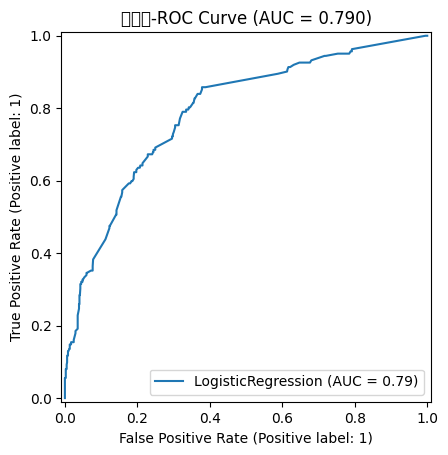

In [ ]:
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.title(f"北北桃-ROC Curve (AUC = {auc:.3f})")
plt.show()

In [ ]:
import statsmodels.api as sm

# 統計分析
X_train_sm = sm.add_constant(X_train_scaled) 
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.389933
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     turnover_intention   No. Observations:                 2295
Model:                          Logit   Df Residuals:                     2289
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.1298
Time:                        15:20:48   Log-Likelihood:                -894.90
converged:                       True   LL-Null:                       -1028.4
Covariance Type:            nonrobust   LLR p-value:                 1.247e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9131      0.070    -27.284      0.000      -2.051      -1.776
x1             0.5239      0.

In [ ]:
stat_df = pd.DataFrame({
    "coef": result.params,
    "p_value": result.pvalues,
    "odds_ratio": np.exp(result.params)
})
print("\n📋 模型係數摘要：")
display(stat_df.sort_values("p_value"))


📋 模型係數摘要：


,coef,p_value,odds_ratio
const,-1.913079,6.631324e-164,0.147625
x1,0.523923,3.378932e-09,1.688639
x5,0.434464,7.392294e-07,1.544135
x2,0.112591,1.690700e-01,1.119174
x4,0.068796,4.272566e-01,1.071218
x3,-0.018668,8.013428e-01,0.981505


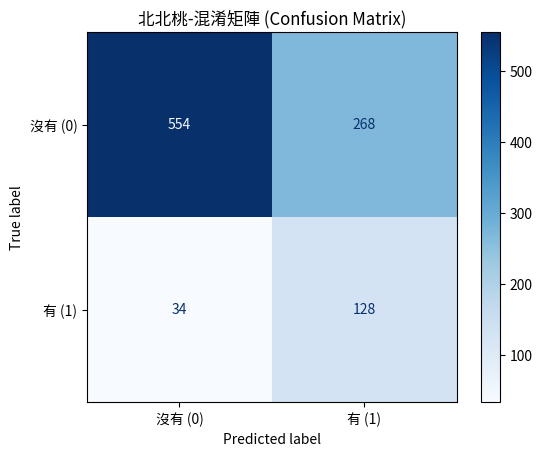

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.font_manager import fontManager

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

fontManager.addfont("ChineseFont.ttf") 
plt.rcParams['font.family'] = 'ChineseFont'

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['沒有 (0)', '有 (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('北北桃-混淆矩陣 (Confusion Matrix)') 
plt.show()

In [ ]:
# 顯示權重資訊
stat_df = pd.DataFrame({'coefficients':result.params, 'p-values':result.pvalues, 'odds_ratio':np.exp(result.params)})
stat_df = stat_df.drop('const')
stat_df

,coefficients,p-values,odds_ratio
x1,0.523923,3.378932e-09,1.688639
x2,0.112591,1.690700e-01,1.119174
x3,-0.018668,8.013428e-01,0.981505
x4,0.068796,4.272566e-01,1.071218
x5,0.434464,7.392294e-07,1.544135


In [ ]:
# 篩選重要的特徵變數
significant_params = stat_df[stat_df['p-values']<=0.05].index
significant_params

Index(['x1', 'x5'], dtype='object')

In [ ]:
# 勝負比排名
stat_df.loc[significant_params].sort_values('odds_ratio',ascending=False)['odds_ratio']

,odds_ratio
x1,1.688639
x5,1.544135


#### 7. 篩選特徵再訓練

In [ ]:

significant_params = [
    'stress_workload_amount',
    'stress_org_climate_grievance',
]

y = df["turnover_intention"]
X = df[significant_params]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)

model_simple = LogisticRegression(class_weight='balanced', random_state=42)
model_simple.fit(X_train_scaled, y_train)

y_pred = model_simple.predict(X_test_scaled)
y_prob = model_simple.predict_proba(X_test_scaled)[:, 1]

print("\n【簡化模型 分類報告】")
print(classification_report(y_test, y_pred))

auc_simple = roc_auc_score(y_test, y_prob)

print(f"【簡化模型 AUC-ROC】: {auc_simple:.4f}")

cm_simple = confusion_matrix(y_test, y_pred)
print("\n【簡化模型 混淆矩陣】")
print(cm_simple)


【簡化模型 分類報告】
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       822
           1       0.32      0.80      0.45       162

    accuracy                           0.68       984
   macro avg       0.63      0.73      0.62       984
weighted avg       0.84      0.68      0.73       984

【簡化模型 AUC-ROC】: 0.7827

【簡化模型 混淆矩陣】
[[545 277]
 [ 33 129]]


In [ ]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=significant_params)

y_train_reset = y_train.reset_index(drop=True)


X_train_const = sm.add_constant(X_train_scaled_df, prepend=False)

try:
    logit_model_simple = sm.Logit(y_train_reset, X_train_const)
    result_simple = logit_model_simple.fit(disp=0) 

    print("\n【簡化模型 統計摘要 (statsmodels)】")
    print(result_simple.summary())

    
    print("\n--- 步驟 7: 計算簡化模型的 勝算比 (Odds Ratios) ---")

    params_simple = result_simple.params
    odds_ratios = np.exp(params_simple)

    conf_int = result_simple.conf_int()
    conf_int_odds = np.exp(conf_int)
    conf_int_odds.columns = ['Odds 2.5%', 'Odds 97.5%']

    odds_df = pd.DataFrame({
        'Odds Ratio': odds_ratios,
        'p-value': result_simple.pvalues
    })
    odds_df = odds_df.join(conf_int_odds)


    print(odds_df.loc[significant_params])

except Exception as e:
    print(f"執行 statsmodels 時發生錯誤: {e}")

print("\n--- 簡化模型再訓練 執行完畢 ---")


【簡化模型 統計摘要 (statsmodels)】
                           Logit Regression Results                           
Dep. Variable:     turnover_intention   No. Observations:                 2295
Model:                          Logit   Df Residuals:                     2292
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.1284
Time:                        15:20:48   Log-Likelihood:                -896.32
converged:                       True   LL-Null:                       -1028.4
Covariance Type:            nonrobust   LLR p-value:                 4.393e-58
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
stress_workload_amount           0.6011      0.074      8.132      0.000       0.456       0.746
stress_org_climate_grievance     0.4936      0.068

<Figure size 600x600 with 0 Axes>

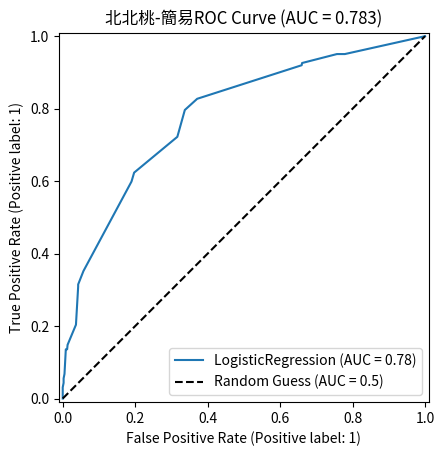

In [ ]:
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(model_simple, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title(f"北北桃-簡易ROC Curve (AUC = {auc_simple:.3f})")
plt.legend()
plt.show()

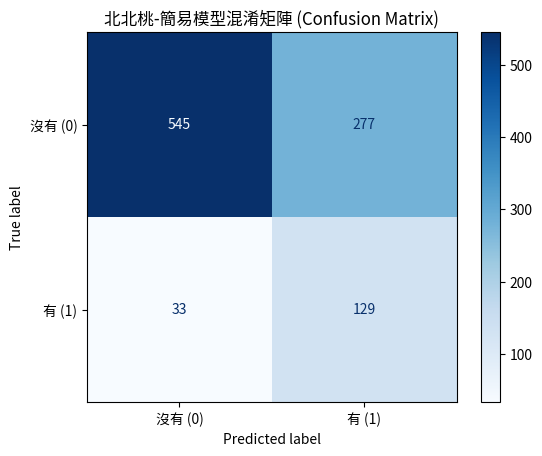

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

fontManager.addfont("ChineseFont.ttf") 
plt.rcParams['font.family'] = 'ChineseFont'

disp = ConfusionMatrixDisplay(confusion_matrix=cm_simple,
                              display_labels=['沒有 (0)', '有 (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('北北桃-簡易模型混淆矩陣 (Confusion Matrix)') 
plt.show()

#### 8. 將模型部署到實際應用

In [ ]:
# 儲存模型與縮放器
import joblib

model_filename = 'simplified_turnover_model.joblib'
joblib.dump(model_simple, model_filename)

print(f"模型已成功儲存為: {model_filename}")

scaler_filename = 'simplified_data_scaler.joblib'
joblib.dump(scaler_simple, scaler_filename)

print(f"資料縮放器已成功儲存為: {scaler_filename}")

模型已成功儲存為: simplified_turnover_model.joblib
資料縮放器已成功儲存為: simplified_data_scaler.joblib
